In [1]:
import pandas as pd
import numpy as np
from glob import glob

from pathlib import Path

from utils.visualize_pics import visualize_pics

In [2]:
df = pd.read_parquet('detected_faces.parquet')

In [3]:
pics = glob('wiki_crop_all/*.jpg')
pics = [Path(p).name for p in pics]

In [4]:
pics[:5]

['10000217_1981-05-05_2009.jpg',
 '10000548_1925-04-04_1964.jpg',
 '100012_1948-07-03_2008.jpg',
 '10001965_1930-05-23_1961.jpg',
 '10002116_1971-05-31_2012.jpg']

In [5]:
df['cords_str'] = df['cords'].apply(lambda x: str(x))

In [6]:
df_cleaned = df.drop_duplicates(subset=['image_name', 'cords_str'], keep='first', inplace=False)
pics_duplicated = df_cleaned[df_cleaned['image_name'].duplicated()].sort_values(by='image_name')['image_name'].unique()
pics_cleaned = df_cleaned['image_name'].drop_duplicates(keep=False).values

In [7]:
# ims = pics_duplicated
ims = pics_cleaned

array(['37757795_1954-05-04_1980.jpg', '27489779_1926-08-27_1978.jpg',
       '34556536_1989-11-10_2011.jpg', ...,
       '27208938_1965-11-13_2011.jpg', '19708224_1986-03-05_2015.jpg',
       '24196494_1991-02-04_2010.jpg'], dtype=object)

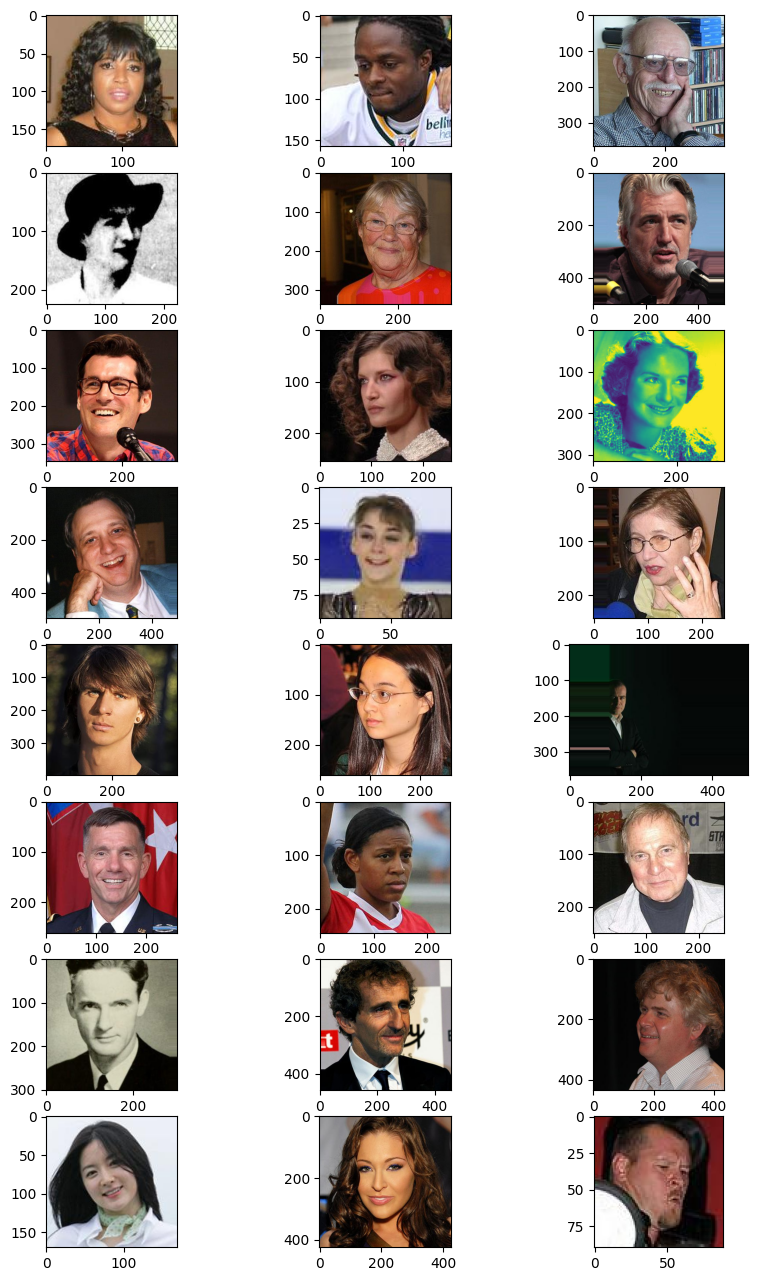

In [8]:
np.random.shuffle(ims)

visualize_pics(ims, 24)